In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from backtest.data import FetchCharts, Cache
from datetime import datetime

In [2]:
TICKERS = ['AAPL', 'NVDA', 'META', "AMZN"]
pipe = FetchCharts(TICKERS) | Cache()
print(pipe)

┌ DataPipe(DataPipeType.CACHE, Cache) ┐
│                                     │
│ FetchCharts -> Cache                │
│                                     │
└─────────────────────────────────────┘


In [3]:
data = pipe.get(datetime(2000, 1, 1), datetime(2020, 1, 1))

In [10]:
chart = data["NVDA"][['Open', 'High', 'Low', 'Close', 'Volume']]
chart.index = chart.index.date

In [11]:
chart

,Open,High,Low,Close,Volume
2000-01-03,0.090282,0.090999,0.084311,0.089446,300912000
2000-01-04,0.087893,0.088132,0.082639,0.087058,300480000
2000-01-05,0.084550,0.085983,0.082997,0.084191,188352000
2000-01-06,0.084191,0.084191,0.075474,0.078698,120480000
2000-01-07,0.078340,0.080848,0.077146,0.080012,71184000
...,...,...,...,...,...
2019-12-24,5.930547,5.958184,5.896189,5.941004,138864000
2019-12-26,5.944490,5.983330,5.925568,5.955196,182852000
2019-12-27,5.970384,5.983829,5.871043,5.897435,254644000
2019-12-30,5.875525,5.880754,5.752782,5.784152,258056000


Text(0, 0.5, 'Probabilities (%)')

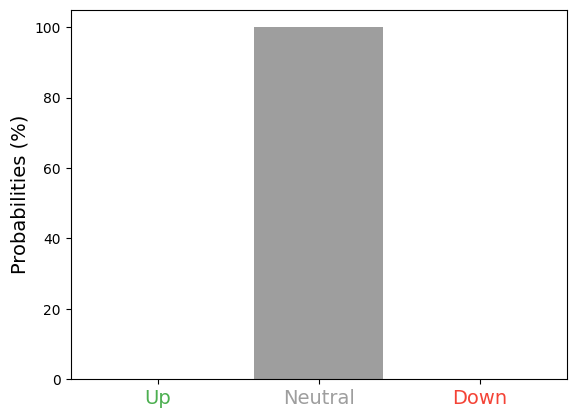

In [31]:
probs = [0, 100, 0]
labels = ['Up', 'Neutral', 'Down']
colors = [(76 / 255, 175 / 255, 80 / 255), (158 / 255, 158 / 255, 158 / 255), (244 / 255, 67 / 255, 54 / 255)]
plt.bar([1, 2, 3], probs, color=colors)
plt.xticks([1, 2, 3], labels, fontsize=14) #, color=[colors[0], colors[1], colors[2]])
ax = plt.gca()
xtick_labels = ax.get_xticklabels()

# Apply the RGB colors to the x-tick labels
for label, color in zip(xtick_labels, colors):
    label.set_color(color)
plt.ylabel("Probabilities (%)", fontsize=14)